In [1]:
# Auto-injected by runner: set inline backend and silence non-interactive warnings
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', message='.*FigureCanvasAgg is non-interactive.*')


# Importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Machine learning & model selection
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import (
    f1_score,
    make_scorer,
    adjusted_rand_score,
    normalized_mutual_info_score,
)
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN

from scipy.optimize import linear_sum_assignment

In [3]:
IMAGE_PATH = "./images/"

# 1. KHẢO SÁT VÀ XỬ LÝ DỮ LIỆU
---
Đọc dữ liệu vào bộ nhớ và hiển thị các thông số sau:
-  a. Kích thước và chiều của dữ liệu
-  b. Kiểu dữ liệu của các thuộc tính
-  c. Số lượng thực thể của các giá trị nhãn
-  d. Giá trị lớn nhất, bé nhất, và trung bình của các cột thuộc tính có giá trị số thực


In [4]:
df = pd.read_csv("glass-data.csv", sep="\t")
df.columns = df.columns.str.strip()  

# Đổi tên cột để dễ thực hiện
df.columns = [
    "Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"
]

# a. Kích thước dữ liệu
print("a. Kích thước dữ liệu:", df.shape)
print("   Số hàng (mẫu):", df.shape[0])
print("   Số cột (thuộc tính):", df.shape[1])

# b. Kiểu dữ liệu
print("\nb. Kiểu dữ liệu của các thuộc tính:")
print(df.dtypes)

# c. Số lượng từng giá trị nhãn (cột Type)
print("\nc. Số lượng thực thể của từng giá trị nhãn:")
print(df["Type"].value_counts())

# d. Giá trị min, max, mean
print("\nd. Giá trị thống kê của các cột số thực:")
print(df.describe().loc[["min", "max", "mean"]])



a. Kích thước dữ liệu: (214, 11)
   Số hàng (mẫu): 214
   Số cột (thuộc tính): 11

b. Kiểu dữ liệu của các thuộc tính:
Id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

c. Số lượng thực thể của từng giá trị nhãn:
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

d. Giá trị thống kê của các cột số thực:
         Id        RI        Na        Mg        Al         Si         K  \
min     1.0  1.511150  10.73000  0.000000  0.290000  69.810000  0.000000   
max   214.0  1.533930  17.38000  4.490000  3.500000  75.410000  6.210000   
mean  107.5  1.518365  13.40785  2.684533  1.444907  72.650935  0.497056   

             Ca        Ba        Fe      Type  
min    5.430000  0.000000  0.000000  1.000000  
max   16.190000  3.150000  0.510000  7.000000  
mean   8.956963  0.175047  0.057009  2.780374  


# 2. TRỰC QUAN HÓA DỮ LIỆU
---
Tạo data mới để trực quan hóa. Data này chỉ lấy các cột thuộc tính là giá trị liên tục. Thu giảm số chiều và hiển thị trên không gian 2D, các nhãn khác ahau cho các màu khác nhau.


Các thuộc tính liên tục: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
Số lượng thuộc tính liên tục: 9
Dữ liệu đã được chuẩn hóa (shape): (214, 9)

3.2. GIẢM SỐ CHIỀU DỮ LIỆU

3.2.1. Áp dụng PCA (Principal Component Analysis)
PCA - Variance explained by PC1: 0.2790 (27.90%)
PCA - Variance explained by PC2: 0.2278 (22.78%)
PCA - Total variance explained: 0.5068 (50.68%)

3.2.2. Áp dụng t-SNE (t-Distributed Stochastic Neighbor Embedding)


t-SNE completed - Shape: (214, 2)

3.3. BIỂU DIỄN DỮ LIỆU TRÊN KHÔNG GIAN 2D THEO NHÃN
3.3.1. Vẽ biểu đồ phân bố nhãn
3.3.2. Vẽ biểu đồ PCA 2D
3.3.3. Vẽ biểu đồ t-SNE 2D



Đã lưu biểu đồ vào file: ./images/visualization_2d.png


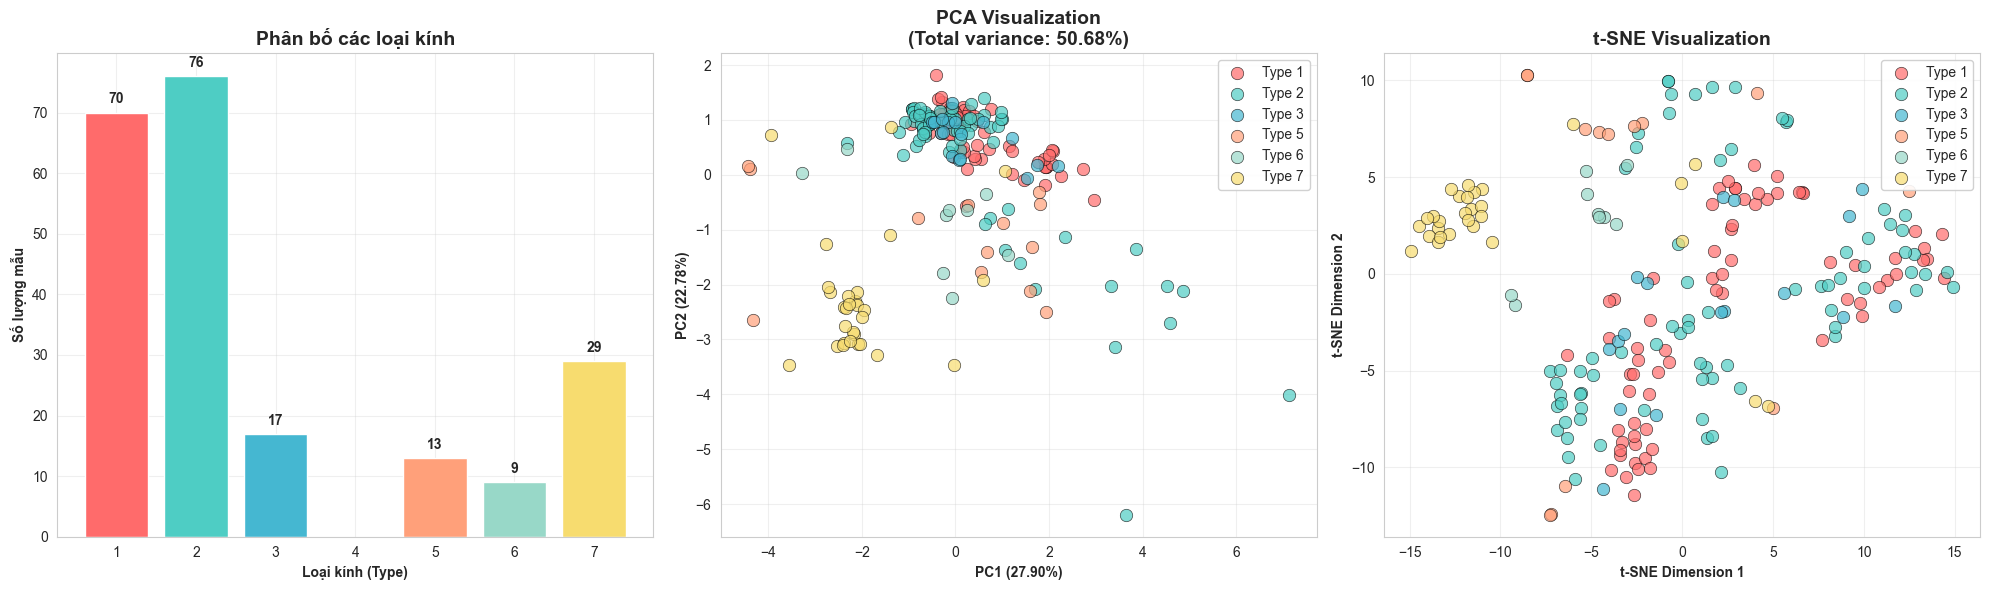


3.3.4. Ma trận tương quan giữa các thuộc tính


Đã lưu ma trận tương quan vào file: ./images/correlation_matrix.png


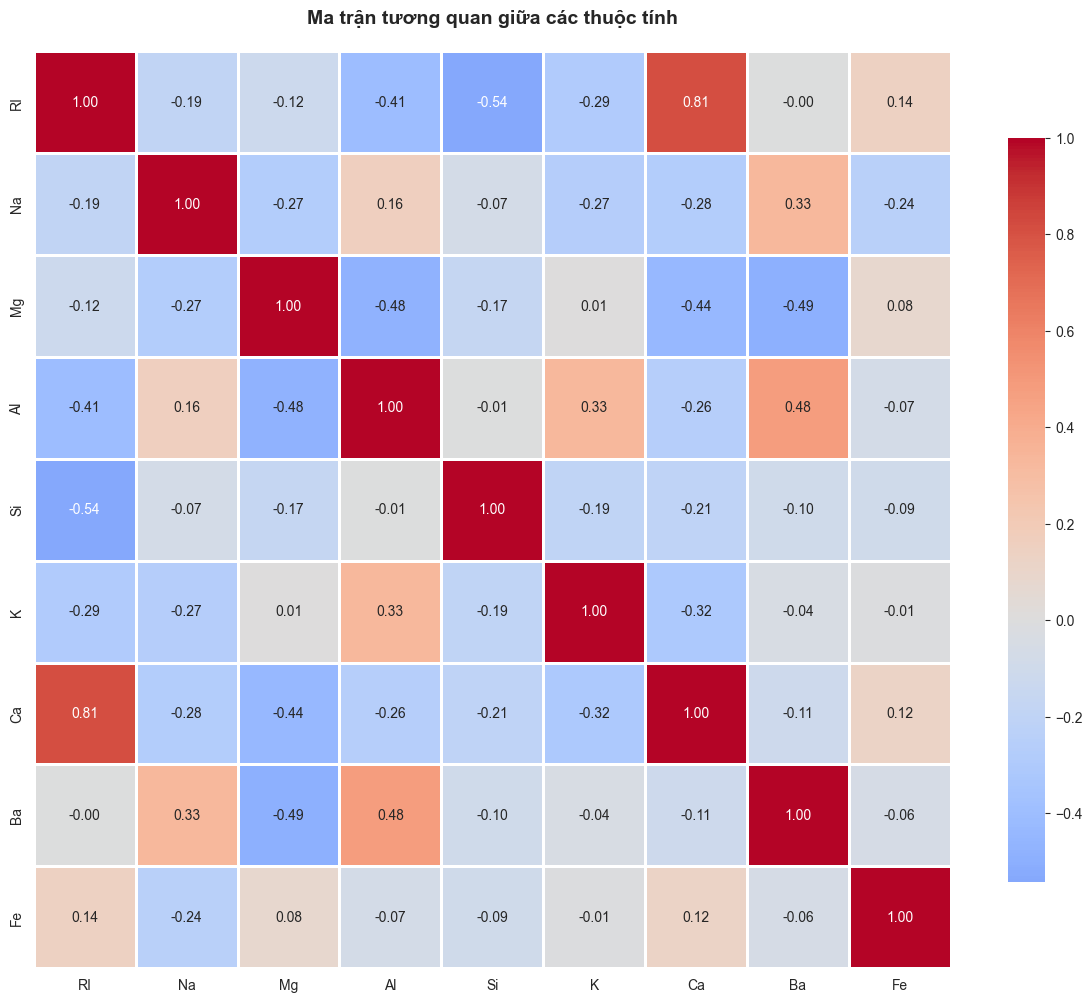


3.3.5. Phân bố từng thuộc tính theo loại kính


Đã lưu biểu đồ phân bố thuộc tính vào file: ./images/feature_distributions.png


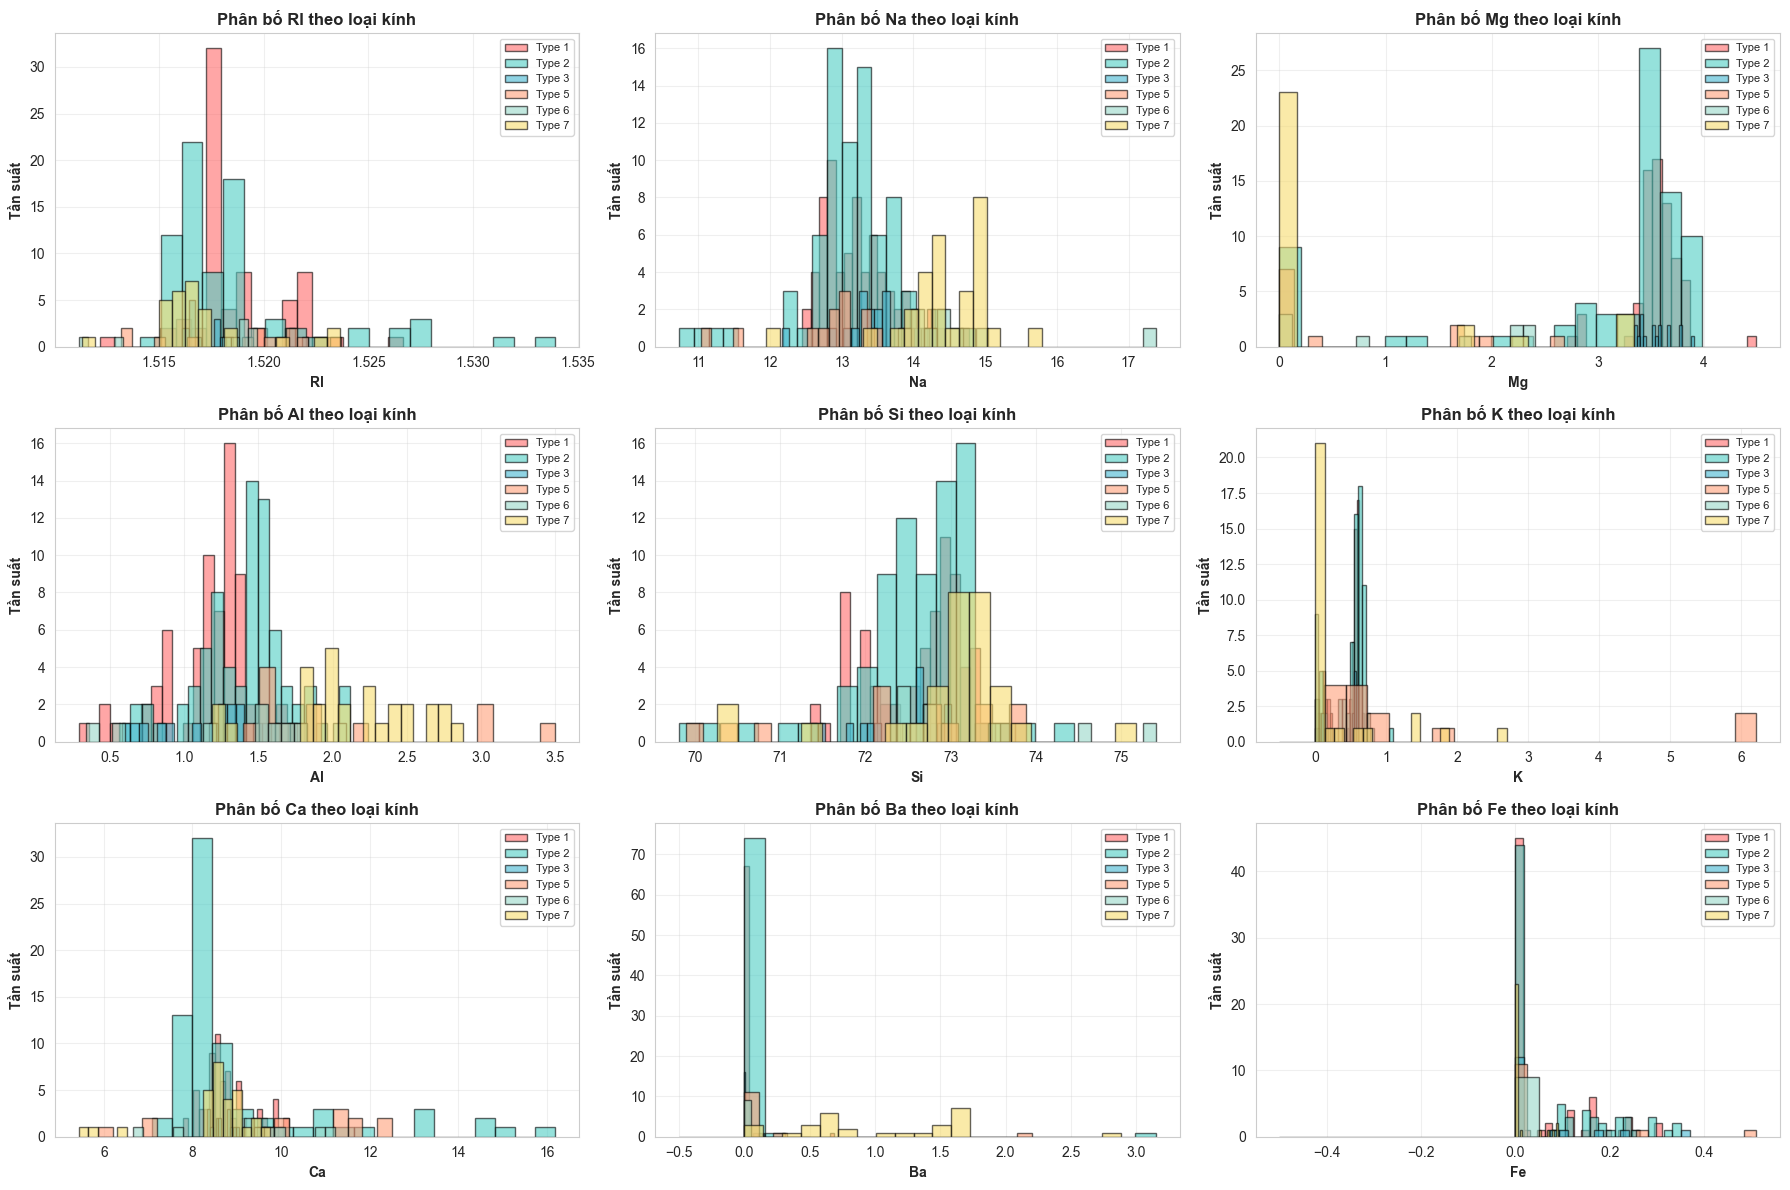


HOÀN THÀNH TRỰC QUAN HÓA DỮ LIỆU

Các file đã được tạo:
  1. ./images/visualization_2d.png - Biểu đồ phân bố nhãn, PCA và t-SNE
  2. ./images/correlation_matrix.png - Ma trận tương quan
  3. ./images/feature_distributions.png - Phân bố các thuộc tính theo loại kính


In [5]:


# Cấu hình hiển thị
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

# Loại bỏ cột Id và Type để chỉ giữ các thuộc tính liên tục
continuous_features = df.drop(columns=['Id', 'Type'])
feature_names = continuous_features.columns.tolist()
print(f"Các thuộc tính liên tục: {feature_names}")
print(f"Số lượng thuộc tính liên tục: {len(feature_names)}")

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(continuous_features)
print(f"Dữ liệu đã được chuẩn hóa (shape): {X_scaled.shape}")

# 3.2. Giảm số chiều dữ liệu bằng PCA / t-SNE
print("\n3.2. GIẢM SỐ CHIỀU DỮ LIỆU")

# PCA - Principal Component Analysis
print("\n3.2.1. Áp dụng PCA (Principal Component Analysis)")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA - Variance explained by PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"PCA - Variance explained by PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"PCA - Total variance explained: {sum(pca.explained_variance_ratio_):.4f} ({sum(pca.explained_variance_ratio_)*100:.2f}%)")

# t-SNE - t-Distributed Stochastic Neighbor Embedding
print("\n3.2.2. Áp dụng t-SNE (t-Distributed Stochastic Neighbor Embedding)")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
print(f"t-SNE completed - Shape: {X_tsne.shape}")

# 3.3. Biểu diễn dữ liệu trên không gian 2D theo nhãn
print("\n3.3. BIỂU DIỄN DỮ LIỆU TRÊN KHÔNG GIAN 2D THEO NHÃN")

# Tạo figure với 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Màu sắc cho từng loại kính
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE']
glass_types = sorted(df['Type'].unique())

# 3.3.1. Biểu đồ phân bố nhãn
print("3.3.1. Vẽ biểu đồ phân bố nhãn")
type_counts = df['Type'].value_counts().sort_index()
axes[0].bar(type_counts.index, type_counts.values, color=colors[:len(type_counts)])
axes[0].set_xlabel('Loại kính (Type)', fontweight='bold')
axes[0].set_ylabel('Số lượng mẫu', fontweight='bold')
axes[0].set_title('Phân bố các loại kính', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
for i, v in enumerate(type_counts.values):
    axes[0].text(type_counts.index[i], v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# 3.3.2. Biểu đồ PCA
print("3.3.2. Vẽ biểu đồ PCA 2D")
for i, glass_type in enumerate(glass_types):
    mask = df['Type'] == glass_type
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=colors[i], label=f'Type {glass_type}', 
                   alpha=0.7, edgecolors='black', linewidth=0.5, s=80)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontweight='bold')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontweight='bold')
axes[1].set_title(f'PCA Visualization\n(Total variance: {sum(pca.explained_variance_ratio_)*100:.2f}%)', 
                 fontsize=14, fontweight='bold')
axes[1].legend(loc='best', framealpha=0.9)
axes[1].grid(True, alpha=0.3)

# 3.3.3. Biểu đồ t-SNE
print("3.3.3. Vẽ biểu đồ t-SNE 2D")
for i, glass_type in enumerate(glass_types):
    mask = df['Type'] == glass_type
    axes[2].scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                   c=colors[i], label=f'Type {glass_type}', 
                   alpha=0.7, edgecolors='black', linewidth=0.5, s=80)
axes[2].set_xlabel('t-SNE Dimension 1', fontweight='bold')
axes[2].set_ylabel('t-SNE Dimension 2', fontweight='bold')
axes[2].set_title('t-SNE Visualization', fontsize=14, fontweight='bold')
axes[2].legend(loc='best', framealpha=0.9)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(IMAGE_PATH + 'visualization_2d.png', dpi=300, bbox_inches='tight')
print("\nĐã lưu biểu đồ vào file: " + IMAGE_PATH + 'visualization_2d.png')
plt.show()

# Thêm biểu đồ heatmap correlation
print("\n3.3.4. Ma trận tương quan giữa các thuộc tính")
plt.figure(figsize=(12, 10))
correlation_matrix = continuous_features.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Ma trận tương quan giữa các thuộc tính', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(IMAGE_PATH + 'correlation_matrix.png', dpi=300, bbox_inches='tight')
print("Đã lưu ma trận tương quan vào file: " + IMAGE_PATH + 'correlation_matrix.png')
plt.show()

# Biểu đồ phân bố từng thuộc tính theo loại kính
print("\n3.3.5. Phân bố từng thuộc tính theo loại kính")
n_features = len(feature_names)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(feature_names):
    for i, glass_type in enumerate(glass_types):
        mask = df['Type'] == glass_type
        axes[idx].hist(df.loc[mask, feature], bins=20, alpha=0.6, 
                      label=f'Type {glass_type}', color=colors[i], edgecolor='black')
    axes[idx].set_xlabel(feature, fontweight='bold')
    axes[idx].set_ylabel('Tần suất', fontweight='bold')
    axes[idx].set_title(f'Phân bố {feature} theo loại kính', fontweight='bold')
    axes[idx].legend(loc='best', fontsize=8)
    axes[idx].grid(True, alpha=0.3)

# Ẩn các subplot thừa
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig(IMAGE_PATH + 'feature_distributions.png', dpi=300, bbox_inches='tight')
print("Đã lưu biểu đồ phân bố thuộc tính vào file: " + IMAGE_PATH + 'feature_distributions.png')
plt.show()

print("\n" + "="*80)
print("HOÀN THÀNH TRỰC QUAN HÓA DỮ LIỆU")
print("="*80)
print("\nCác file đã được tạo:")
print("  1. " + IMAGE_PATH + 'visualization_2d.png - Biểu đồ phân bố nhãn, PCA và t-SNE')
print("  2. " + IMAGE_PATH + 'correlation_matrix.png - Ma trận tương quan')
print("  3. " + IMAGE_PATH + 'feature_distributions.png - Phân bố các thuộc tính theo loại kính')

# 3. NGHIÊN CỨU VÀ ĐÁNH GIÁ CÁC MÔ HÌNH HỌC MÁY
---
Huấn luyện các mô hình học máy và so sánh đánh giá theo k-fold cross validation, với k=10. Chọn 3 mô hình để đánh giá trong các mô hình phân lớp sau: KNN, Random Forest, Naive Bayes,  AdaBoost, và SVM.
Tinh chỉnh tham số để các mô hình cho kết quả tốt nhất trước khi so sánh.
Trình bày bảng so sánh hiệu năng các mô hình với độ đo F-Score


In [6]:


# === 1. Chuẩn bị dữ liệu đặc trưng và nhãn ===
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# === 2. Cấu hình Cross-Validation và độ đo ===
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
f1 = make_scorer(f1_score, average='macro')

# === 3. Mô hình & tham số cần tinh chỉnh ===
models = {
    "KNN": (
        Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]),
        {"knn__n_neighbors": [3, 5, 7, 9],
         "knn__weights": ["uniform", "distance"]}
    ),
    
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {"n_estimators": [100, 200, 300],
         "max_depth": [None, 5, 10, 20],
         "min_samples_split": [2, 5]}
    ),
    
    "SVM (RBF)": (
        Pipeline([("scaler", StandardScaler()), ("svm", SVC())]),
        {"svm__C": [0.1, 1, 10],
         "svm__gamma": ["scale", "auto"],
         "svm__kernel": ["rbf"]}
    )
}

# === 4. Huấn luyện & lưu kết quả ===
rows = []

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=kfold, scoring=f1, n_jobs=-1)
    grid.fit(X, y)

    rows.append([
        name,
        round(grid.best_score_, 4),
        grid.best_params_
    ])

results = pd.DataFrame(rows, columns=["Model", "F1 Score (Macro)", "Best Hyperparameters"])

# === 5. Hiển thị kết quả ===
print("\n KẾT QUẢ SO SÁNH MÔ HÌNH\n")
for idx, row in results.iterrows():
    print(f"🔹 Model: {row['Model']}")
    print(f"   F1 Score (Macro): {row['F1 Score (Macro)']}")
    print(f"   Best Params:")
    for k, v in row["Best Hyperparameters"].items():
        print(f"      {k}: {v}")
    print("-" * 50)


 KẾT QUẢ SO SÁNH MÔ HÌNH

🔹 Model: KNN
   F1 Score (Macro): 0.7873
   Best Params:
      knn__n_neighbors: 3
      knn__weights: distance
--------------------------------------------------
🔹 Model: Random Forest
   F1 Score (Macro): 0.9765
   Best Params:
      max_depth: None
      min_samples_split: 2
      n_estimators: 200
--------------------------------------------------
🔹 Model: SVM (RBF)
   F1 Score (Macro): 0.8221
   Best Params:
      svm__C: 10
      svm__gamma: scale
      svm__kernel: rbf
--------------------------------------------------


# 4. NGHIÊN CỨU VÀ ĐÁNH GIÁ CÁC MÔ HÌNH HỌC MÁY
---
Loại trừ cột nhãn và thực hiện gom cụm với K-Means và DBSCAN. Dùng giá trị nhãn để đánh giá kết quả gom cụm của hai giải thuật trên.

=== KMeans ===
{'F1_macro': 0.3910353802045295, 'ARI': 0.16995347421044565, 'NMI': 0.3134307776122713, 'Mapping': {np.int32(0): np.int64(7), np.int32(1): np.int64(2), np.int32(2): np.int64(6), np.int32(3): np.int64(1), np.int32(4): np.int64(5), np.int32(5): np.int64(3)}}

=== DBSCAN ===
{'F1_macro': 0.24399007647738613, 'ARI': 0.20469404788220397, 'NMI': 0.3406724491155209, 'Mapping': {np.int64(-1): np.int64(2), np.int64(0): np.int64(1), np.int64(1): np.int64(3), np.int64(2): np.int64(5), np.int64(3): np.int64(7)}}



Đã lưu biểu đồ KMeans vào file: ./images/kmeans_clusters_pca.png


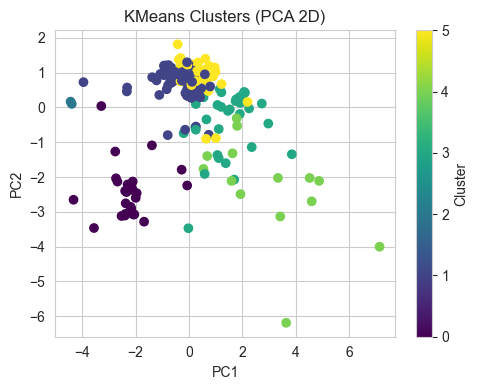

Đã lưu biểu đồ DBSCAN vào file: ./images/dbscan_clusters_pca.png


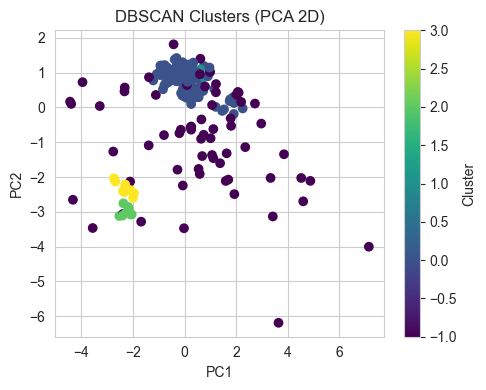


HOÀN THÀNH GOM CỤM


In [7]:
# Chuẩn bị dữ liệu (bỏ Id và nhãn)
X = df.drop(columns=["Id", "Type"]).values
y = df["Type"].values

# Chuẩn hóa dữ liệu
X_scaled = StandardScaler().fit_transform(X)

#  Chạy K-Means và DBSCAN
n_clusters = len(np.unique(y))
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20)
km_labels = kmeans.fit_predict(X_scaled)

db = DBSCAN(eps=1.0, min_samples=5)   # eps có thể thử lần lượt: 0.8, 1.0, 1.2
db_labels = db.fit_predict(X_scaled)

# Hàm ánh xạ cụm ↔ nhãn thật (để tính F1)
def best_map(y_true, y_pred):
    labels_true = np.unique(y_true)
    labels_pred = np.unique(y_pred)
    cost = np.zeros((len(labels_pred), len(labels_true)), dtype=int)
    for i, lp in enumerate(labels_pred):
        for j, lt in enumerate(labels_true):
            cost[i, j] = np.sum((y_pred == lp) & (y_true == lt))
    r, c = linear_sum_assignment(cost.max() - cost)
    mapping = {labels_pred[ri]: labels_true[ci] for ri, ci in zip(r, c)}
    y_mapped = np.array([mapping.get(lp, -1) for lp in y_pred])
    return y_mapped, mapping

# Hàm đánh giá gom cụm
def evaluate(y_true, y_pred):
    y_mapped, mapping = best_map(y_true, y_pred)
    return {
        "F1_macro": f1_score(y_true, y_mapped, average="macro"),
        "ARI": adjusted_rand_score(y_true, y_pred),
        "NMI": normalized_mutual_info_score(y_true, y_pred),
        "Mapping": mapping,
    }

#  Tính và in kết quả
km_eval = evaluate(y, km_labels)
db_eval = evaluate(y, db_labels)

print("=== KMeans ===")
print(km_eval)
print("\n=== DBSCAN ===")
print(db_eval)

#  Vẽ biểu đồ PCA 2D
X_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled)

plt.figure(figsize=(5, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km_labels, cmap='viridis')
plt.title("KMeans Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.savefig(IMAGE_PATH + 'kmeans_clusters_pca.png', dpi=300, bbox_inches='tight')
print(f"\nĐã lưu biểu đồ KMeans vào file: {IMAGE_PATH}kmeans_clusters_pca.png")
plt.show()

plt.figure(figsize=(5, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='viridis')
plt.title("DBSCAN Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.savefig(IMAGE_PATH + 'dbscan_clusters_pca.png', dpi=300, bbox_inches='tight')
print(f"Đã lưu biểu đồ DBSCAN vào file: {IMAGE_PATH}dbscan_clusters_pca.png")
plt.show()

print("\n" + "="*80)
print("HOÀN THÀNH GOM CỤM")
print("="*80)